# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
list_weather=[]
i = 1
for city in cities:
    url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&q=" + city + "&appid=" + api_key
    try:
        response = requests.get(url).json()
        latitude = response['coord']['lat']
        longitude= response['coord']['lon']
        temperature =response['main']['temp']
        max_temperature=response['main']['temp_max']
        humidity = response['main']['humidity']
        wind_speed= response['wind']['speed']
        cloudiness= response['clouds']['all']
        country =response['sys']['country']
        date=response['dt']
        list_weather.append({"City":city,"City Id":i, "Country":country,"Date":date,"Latitude":latitude, "Longitude":longitude,
                             "Temperature":temperature,"Max Temperature": max_temperature,
                             "Humidity":humidity,"Wind Speed":wind_speed, "Cloudiness":cloudiness})
        i+= 1
    except requests.exceptions.RequestException as e:
        print(e)
    except:
        print("Correct values not found for" + city)



    

Correct values not found forburica
Correct values not found fortsihombe
Correct values not found forvaitupu
Correct values not found forbalykshi
Correct values not found formaimon
Correct values not found forsorvag
Correct values not found fornaftah
Correct values not found fortumannyy
Correct values not found fortaolanaro
Correct values not found forilloqqortoormiut
Correct values not found forsentyabrskiy
Correct values not found forbelushya guba
Correct values not found formys shmidta
Correct values not found forcoulihaut
Correct values not found forgrand centre
Correct values not found forarmacao dos buzios
Correct values not found forpalabuhanratu
Correct values not found forsamusu
Correct values not found foramderma
Correct values not found forgeylegphug
Correct values not found forgrand river south east
Correct values not found forsinkat
Correct values not found forumzimvubu
Correct values not found forbarentsburg
Correct values not found formrirt
Correct values not found forvse

In [6]:
len(list_weather)

544

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#city_data.to_csv("CityData.csv")
city_data=pd.DataFrame(list_weather)
city_data.set_index(['City Id'], inplace = True)
city_data


,City,Country,Date,Latitude,Longitude,Temperature,Max Temperature,Humidity,Wind Speed,Cloudiness
City Id,,,,,,,,,,
1,laguna,US,1586629014,38.42,-121.42,58.60,63.00,77,8.05,90
2,kahului,US,1586629030,20.89,-156.47,72.52,77.00,69,13.87,1
3,acapulco,MX,1586629338,16.86,-99.89,84.20,84.20,74,6.93,40
4,hermanus,ZA,1586629090,-34.42,19.23,67.75,70.00,76,3.00,100
5,sao filipe,CV,1586629339,14.90,-24.50,77.70,77.70,69,11.54,10
...,...,...,...,...,...,...,...,...,...,...
540,capim grosso,BR,1586629388,-11.38,-40.01,84.18,84.18,55,2.75,99
541,olafsvik,IS,1586629040,64.89,-23.71,37.87,37.87,77,30.65,37
542,bulata,PH,1586629432,9.86,122.40,81.37,81.37,74,6.06,5


In [13]:
city_data.to_csv("../"+output_data_file)


In [15]:
# # Get a unix timestamp from the dataframe (max value) and convert it into a date
td_unix_date = city_data['Date'].max()
today_date = datetime.datetime.fromtimestamp(
        int(td_unix_date)
    ).strftime('%Y-%m-%d')
today_date

'2020-04-11'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

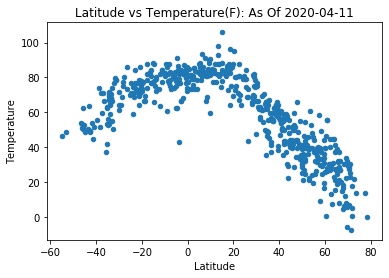

In [16]:
lat_temp_scatter= city_data.plot.scatter(x='Latitude', y ='Temperature')
today = pd.Timestamp('today')
plt.title(f"Latitude vs Temperature(F): As Of {today_date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("Lat_vs_Temp")



# #Latitude vs Temperature Analysis


Looking at the above plot, it can be inferred that the temperature is highest at the equator, and it is at it's lowest at the highest latitude. For latitude ranges (-40, 40), temperature ranges are similar, with an increase in temperature as we move closer to the equator. once the latitude is higher than 40 degrees. there is a steep drop in the temperature.

#### Latitude vs. Humidity Plot

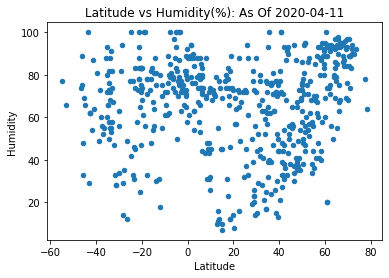

In [17]:
lat_humid_scatter= city_data.plot.scatter(x='Latitude', y ='Humidity')
plt.title(f"Latitude vs Humidity(%): As Of {today_date}")
plt.savefig("Lat_vs_Humid")

# Latitude vs Humidity Analysis

As per the selected data, today's analysis results into the fact that 
1. the humidity is relatively high around the equatorial belt
2. high levels of humidity are observed in cities which are in Northern Hemisphere, furthur away from the pole. 


#### Latitude vs. Cloudiness Plot

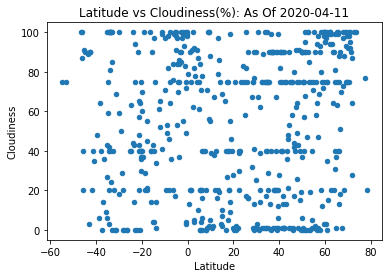

In [18]:
lat_cloud_scatter= city_data.plot.scatter(x='Latitude', y ='Cloudiness')
plt.title(f"Latitude vs Cloudiness(%): As Of {today_date}")
plt.savefig("lat_cloud")

# Latitude vs Cloudiness Analysis

No inference could be drawn looking at the above plot as the data points are scattered all over the grid.

#### Latitude vs. Wind Speed Plot

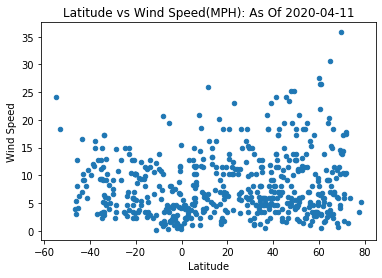

In [19]:
lat_wind_scatter= city_data.plot.scatter(x='Latitude', y ='Wind Speed')
plt.title(f"Latitude vs Wind Speed(MPH): As Of {today_date}")
plt.savefig("lat_wind")

# Latitude vs Wind Speed Analysis

As per the above plot, today's analysis indicate that the general wind speed is between the range of 0mph-20mph, irrestpective of the latitude. Even though higher latitude regions may experience some instances where the winds may gust above 20mph.

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots



In [20]:
# Create Northern Hemisphere DataFrame
city_data_northern= city_data.loc[city_data['Latitude']>=0]
city_data_northern

,City,Country,Date,Latitude,Longitude,Temperature,Max Temperature,Humidity,Wind Speed,Cloudiness
City Id,,,,,,,,,,
1,laguna,US,1586629014,38.42,-121.42,58.60,63.00,77,8.05,90
2,kahului,US,1586629030,20.89,-156.47,72.52,77.00,69,13.87,1
3,acapulco,MX,1586629338,16.86,-99.89,84.20,84.20,74,6.93,40
5,sao filipe,CV,1586629339,14.90,-24.50,77.70,77.70,69,11.54,10
6,qaanaaq,GL,1586628726,77.48,-69.36,13.87,13.87,78,3.33,77
...,...,...,...,...,...,...,...,...,...,...
538,grand-lahou,CI,1586629431,5.14,-5.02,83.25,83.25,80,8.23,61
541,olafsvik,IS,1586629040,64.89,-23.71,37.87,37.87,77,30.65,37
542,bulata,PH,1586629432,9.86,122.40,81.37,81.37,74,6.06,5


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

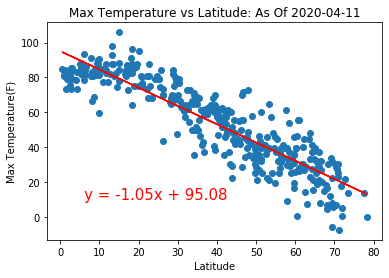

In [21]:
x_values = city_data_northern['Latitude']
y_values = city_data_northern['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title(f"Max Temperature vs Latitude: As Of {today_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.savefig("MaxTemp_Lat")

In [25]:
# Create Southern Hemisphere DataFrame
city_data_southern= city_data.loc[city_data['Latitude']<0]
city_data_southern

,City,Country,Date,Latitude,Longitude,Temperature,Max Temperature,Humidity,Wind Speed,Cloudiness
City Id,,,,,,,,,,
4,hermanus,ZA,1586629090,-34.42,19.23,67.75,70.00,76,3.00,100
8,rantepao,ID,1586629339,-2.97,119.90,66.42,66.42,72,1.88,85
9,bluff,NZ,1586628995,-46.60,168.33,54.00,54.00,74,4.00,100
12,esperance,AU,1586628993,-33.87,121.90,68.00,68.00,68,17.22,81
13,almeirim,BR,1586629340,-1.52,-52.58,87.12,87.12,66,1.05,93
...,...,...,...,...,...,...,...,...,...,...
525,koumac,NC,1586629429,-20.57,164.28,74.05,74.05,75,5.64,30
528,burnie,AU,1586629430,-41.07,145.92,51.51,52.00,64,11.01,35
537,wanaka,NZ,1586629431,-44.70,169.15,48.90,48.90,66,6.24,90


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

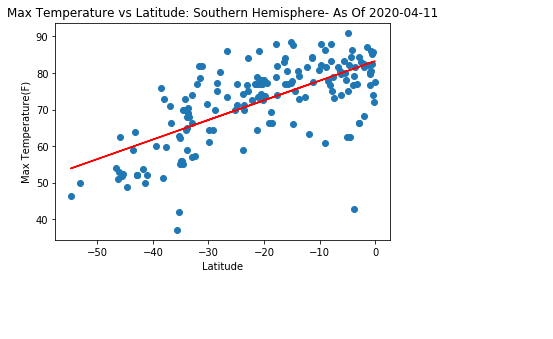

In [34]:
x_values = city_data_southern['Latitude']
y_values = city_data_southern['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f"Max Temperature vs Latitude: Southern Hemisphere- As Of {today_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.savefig("MaxTemp_Lat_South")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

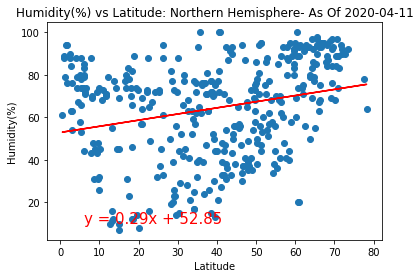

In [36]:
x_values = city_data_northern['Latitude']
y_values = city_data_northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f"Humidity(%) vs Latitude: Northern Hemisphere- As Of {today_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("MaxTemp_Humid_North")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

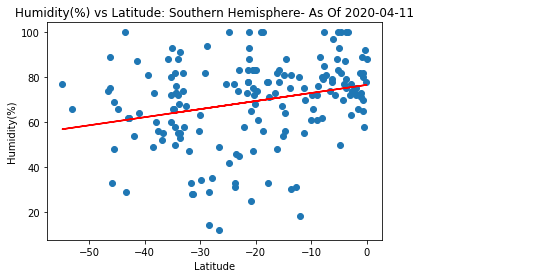

In [37]:
x_values = city_data_southern['Latitude']
y_values = city_data_southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f"Humidity(%) vs Latitude: Southern Hemisphere- As Of {today_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("MaxTemp_Humid_South")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

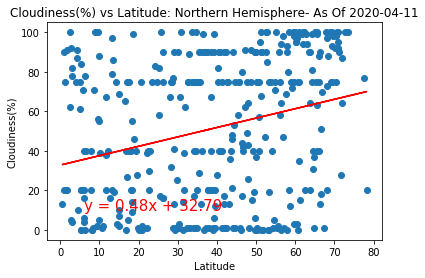

In [38]:
x_values = city_data_northern['Latitude']
y_values = city_data_northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f"Cloudiness(%) vs Latitude: Northern Hemisphere- As Of {today_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("MaxTemp_Cloud_North")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(6, 10, 'y = 0.49x + 66.43')

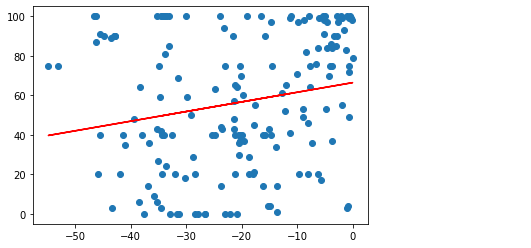

In [29]:
x_values = city_data_southern['Latitude']
y_values = city_data_southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(6, 10, 'y = 0.03x + 7.61')

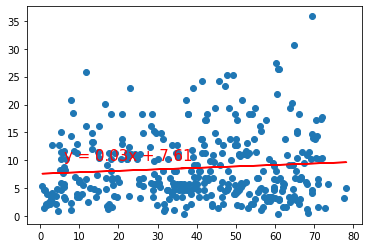

In [30]:
x_values = city_data_northern['Latitude']
y_values = city_data_northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(6, 10, 'y = -0.11x + 4.98')

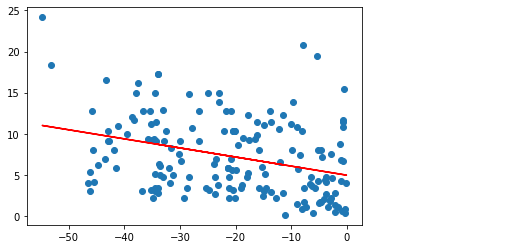

In [32]:
x_values = city_data_southern['Latitude']
y_values = city_data_southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Observations:Northern Hemisphere
#### As the latitude increases:
There is a negative correlation between maximum temperature and latitude. That is, as the latitude increases, max-temperature decreases and vice-versa.
No definitive relationship can be inferred between the latitude and the level of humidity. Same can be stated for cloudiness versus latitude analysis.
Again, latitude does not seem to have an impact on the wind speed.The line of regression is almost a horizontal line, indicating similar wind speed, irrespective of the increase or decrease in the latitude.


# Observations:Southern Hemisphere
#### As the latitude increases:
There is a positive correlation between maximum temperature and latitude. That is, as the latitude increases, max-temperature increases and vice-versa.The regression line shows a close relationship between these two parameters as most of the data points are clustered around it.
Even though the humidity generally is higher in southern hemisphere, still as the latitude increases, there is a higher concentration of data point around the regression line, thus indicating that as latitude increases, there are more pockets of high humidity.
Some data points fall on the line of regression for cloudiness vs latitude analysis, therefor there does not seem to be a clear relationship between the two variables. However, a positive slope indicate that as latitude increases, there is some increase in the cloudiness.
According to the plot for wind speed and latitude, the line of regression has a negative slope with a significant number of data points clustered around it. Therefor, it can be deduced that the wind speed drops as the latitude increases.
